In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/nlp_analise_sentimento/refs/heads/main/Dados/dataset_avaliacoes.csv')

In [2]:
df.head()

,ID_avaliacao,avaliacao,nota,sentimento
0,81841,"Esse smartphone superou minhas expectativas, r...",5,positivo
1,28031,o cheiro e muito desagradavel!! pra quem se in...,2,negativo
2,91332,"Eu fiz a compra a loja não entregou o produto,...",1,negativo
3,110045,"Atendeu minhas expectativas, só achei a luz ru...",4,positivo
4,36929,"Gostei muito, só achei que ficou a desejar a q...",5,positivo


In [3]:
df.shape

(15501, 4)

In [4]:
df.value_counts('sentimento')

sentimento
positivo    7890
negativo    7611
Name: count, dtype: int64

In [5]:
print('Positiva \n')

df.avaliacao[0]

Positiva 



'Esse smartphone superou minhas expectativas, recomendo'

In [6]:
print('Negativa \n')

df.avaliacao[2]

Negativa 



'Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra.'

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
texto = ['Comprei um produto ótimo', 'Comprei um produto ruim']

vetorizar = CountVectorizer()

bag_of_words = vetorizar.fit_transform(texto)

In [9]:
bag_of_words

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (2, 5)>

In [10]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [11]:
matriz_esparsa

,comprei,produto,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [12]:
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(df.avaliacao)

print(bag_of_words.shape)

(15501, 23352)


In [13]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(df.avaliacao)

print(bag_of_words.shape)

(15501, 50)


In [14]:
matriz_esparsa_avaliacoes = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())
matriz_esparsa_avaliacoes

,Não,Produto,ainda,antes,as,até,bem,bom,chegou,com,...,qualidade,que,recebi,recomendo,se,sem,tem,um,uma,veio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,1,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
15497,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
15498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15499,0,1,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words, df.sentimento, random_state=4978)

In [16]:
from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression()

regressao_logistica.fit(X_treino, y_treino)

acuracia = regressao_logistica.score(X_teste, y_teste)

print(acuracia)

0.7982456140350878


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def classificar_texto(df, coluna_texto, coluna_sentimento):
    # Vetorização do texto
    vectorizer = CountVectorizer(lowercase=False, max_features=50)
    X = vectorizer.fit_transform(df[coluna_texto])
    y = df[coluna_sentimento]
    
    # Separação em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Modelo de regressão logística
    modelo = LogisticRegression()
    modelo.fit(X_train, y_train)
    
    # Predição e cálculo da acurácia
    y_pred = modelo.predict(X_test)
    acuracia = accuracy_score(y_test, y_pred)
    
    return print(f"Acurácia do modelo com '{coluna_texto}': {acuracia * 100:.2f}%")


In [23]:
classificar_texto(df, 'avaliacao', 'sentimento')

Acurácia do modelo com 'avaliacao': 80.33%


In [24]:
from wordcloud import WordCloud



In [37]:
todas_palavras = [texto for texto in df.avaliacao]

In [38]:
todas_palavras

['Esse smartphone superou minhas expectativas, recomendo',
 'o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo..',
 'Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra.',
 'Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento.',
 'Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor .',
 'Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!!',
 'o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado',
 'já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen',
 'nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA 

In [48]:
todas_palavras = ' '.join([str(texto) for texto in df['avaliacao'] if pd.notnull(texto)])
print(todas_palavras)

Esse smartphone superou minhas expectativas, recomendo o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo.. Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra. Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento. Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor . Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!! o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA LOGISTICA. Ja solicitei o cancelam

In [45]:
print(df['avaliacao'].head())
print(df['avaliacao'].isnull().sum())

0    Esse smartphone superou minhas expectativas, r...
1    o cheiro e muito desagradavel!! pra quem se in...
2    Eu fiz a compra a loja não entregou o produto,...
3    Atendeu minhas expectativas, só achei a luz ru...
4    Gostei muito, só achei que ficou a desejar a q...
Name: avaliacao, dtype: object
0


In [50]:
nuvem_palavras = WordCloud().generate(todas_palavras)

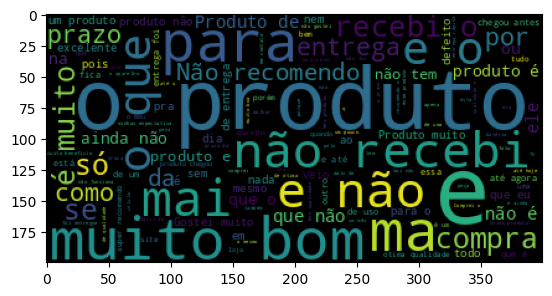

In [51]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(nuvem_palavras)
plt.show()

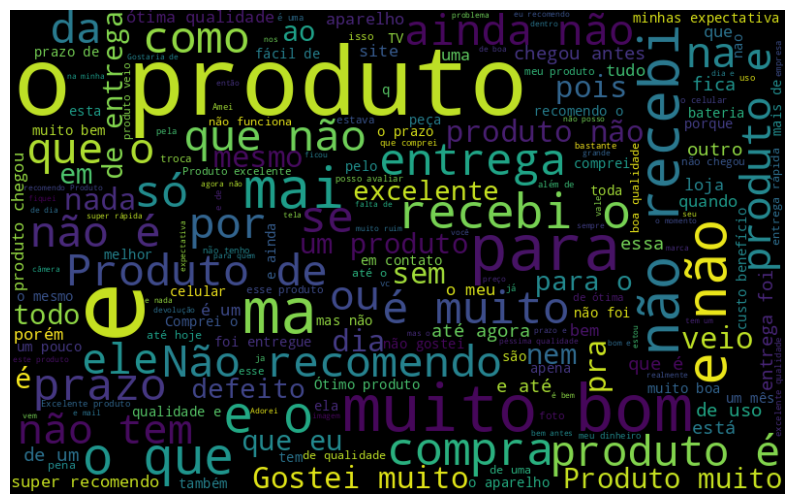

In [52]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110).generate(todas_palavras)
plt.figure(figsize=(10, 7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()


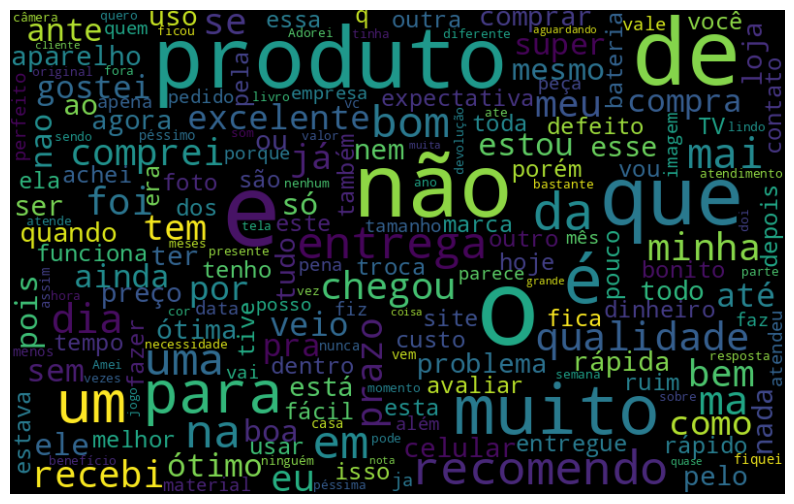

In [53]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
plt.figure(figsize=(10, 7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()
